# Import Important Libraries

In [37]:
# Standard Libraries
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt

# Use Case Library
import easyocr # OCR Library
import cv2 # Computer Vision library
import glob # Read filename
import PIL # Fix -module 'PIL.Image' has no attribute 'ANTIALIAS'- error
from scipy import stats # Statistical Testing
from scipy.stats import shapiro, levene # Statistical Testing
import scikit_posthocs as sp # Posthoc Analysis

# Custom Functions

In [35]:
# function to check python virtual environment to ensure libraries are installed
def checkEnv():
    import sys
    envpath = (sys.executable)
    env = envpath.split('\\')             
    print("Your current python virtual environment is {}".format(env[5]))
# Check for correct environment
checkEnv()

# function to visualise image using the cv2 library
def checkImage(img, result):
    for i in range(len(result)):
        # top_left, bot_right = tuple(result[i][0][0]), tuple(result[i][0][2])
        top_left, bot_right = (int(result[i][0][0][0]),int(result[i][0][0][1])), (int(result[i][0][2][0]),int(result[i][0][2][1]))
        img = cv2.rectangle(img, top_left, bot_right, (0,255,128), 3)
    return img

# Function to calculate the total seconds based on the column - Duration
def findTotalSeconds(timestr):
    min, sec = int(timestr.split(":")[0]), int(timestr.split(":")[1])
    total = (min * 60) + sec
    return total

# Function to calculate hours:min:sec based on the Duration Column
def findTime(timestr):
    """Converts a string in the format 'minutes:seconds' to a datetime object.
    Args: time_str: The input string in the format 'minutes:seconds'.
    Returns: A datetime.datetime object representing the time.
    """
    # split the string and cast it to integer
    minutes, seconds = map(int, timestr.split(":"))
    # Find the number of hours
    hours = minutes // 60
    # Find the number of leftover mins 
    minutes = minutes % 60

    total_seconds = hours * 3600 + minutes * 60 + seconds
    timing_obj = datetime.datetime(1, 1, 1) + datetime.timedelta(seconds=total_seconds)
    
    return (timing_obj.strftime("%H:%M:%S"))

    # print(time_obj.strftime("%H:%M:%S"))  
    # return datetime.datetime(1, 1, 1) + datetime.timedelta(seconds=total_seconds)

# Function to subset the dataframe based on 'Map' column using the groupby function
def subsetDataframe(df):
    # Initialize an empty dictionary to store each subset dataframe
    df_dict = {}

    # subset the 'df' parameter using the 'Map' Column with the .groupby function
    # Returns a dataframe GroupBy object - A tuple of Map Name and Dataframe
    grouped_df = df.groupby('Map')
    
    # Using a loop to append each tuple into a dictionary
    #{'key':'value'} = {map,dataframe}
    for name, data in grouped_df:
        # Reset the index of the Dataframe
        data = data.reset_index(drop=True)
        df_dict[name] = data
    return df_dict

Your current python virtual environment is Pyv39


# Read the Image from the folder and read using the EasyOCR reader object

In [33]:
# # locate the image
# image_path = './MSM/ab_56_sf158.jpg'

# # Fixes the -module 'PIL.Image' has no attribute 'ANTIALIAS'- error
# PIL.Image.ANTIALIAS = PIL.Image.LANCZOS 

# # initialise the reader object and read the image
# reader = easyocr.Reader(['en'], gpu = False)
# result = reader.readtext(image_path)

Using CPU. Note: This module is much faster with a GPU.


In [3]:
# display(result)
# display(int(result[-1][0][0][0]))

# Notice that the non-numerical text have been extracted as well

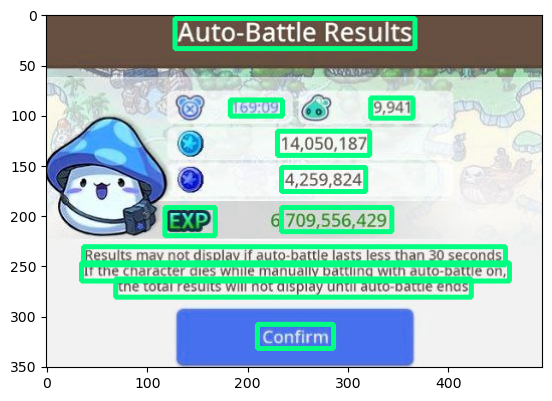

In [38]:
# # Visualise each extracted element of the image using the function - checkImage
# img = cv2.imread(image_path,1)
# checked_img = checkImage(img, result)
# plt.imshow(checked_img)
# plt.show()

# # Save the image to the desktop
# plt.imsave('sample_image.jpg', checked_img)

# Remove the unnecssary list elements - clean_result 
The "clean_result" list will only contain the following stats:
1. "Auto-Battle"
2. Duration
3. Kill Count
4. Regular Meso Gained
5. Red Meso Gained
6. Total Exp Gained

# Transform "clean_result" to "Final_result_list"
removes all the unneeded information for a cleaner list

In [5]:
# print("Length of List: {}".format(len(result)))
# for i in range(len(result)):
#     print(result[i])

In [6]:
# clean_result = result[:7] # remove the last 4 elements
# clean_result.pop(5) # remove the 5th element from clean_result
# print("Length of List: {}".format(len(clean_result)))
# for i in range(len(clean_result)):
#     print(clean_result[i])

In [7]:
# # Visualise each extracted element of the image using the function - checkImage
# img = cv2.imread(image_path,1)
# checked_img = checkImage(img, clean_result)
# plt.imshow(checked_img)
# plt.show()

In [8]:
# for i in range(len(clean_result)):
#     print(clean_result[i])

In [9]:
# # initialise empty list
# info_list = ['Description', 'Duration', 'Kill Count', 'Meso', 'Red Meso', 'Total EXP Gained']
# final_result_list = []

# #appends each element (from clean_result) into the empty list
# for i in range(len(clean_result)):
#     ele = [info_list[i], clean_result[i][1]]
#     final_result_list.append(ele)

# # display final_result_list [description, duration, KC, Reg Meso, Red Meso, EXP]
# display(final_result_list)

# Summary of the above:
1. Extracts the important statistics from the Autobattle image
2. Visualise it for better clarity
3. Removed the unnecessary list and list elements
4. Results in a clean list of duration, kill count, meso, red meso and exp
# Limitations
1. Only one image at a time
2. Still have to manually take screenshots
# Suggestion
1. Process multiple image in one go
2. Include map name, character class & name, datetime and timestamp
3. append the results into a container (dictionary, dataframe)

# Use Case for EasyOCR
Imagine you're interested in gathering information about the meso & exp rates in different Star Force (SF) and Arcane Force(AF) maps.
You take a screenshot of each autobattle(AB) but you're too lazy to manually add these figure into a spreadsheet. This is where easyOCR comes in. 



In [39]:
# Fixes the -module 'PIL.Image' has no attribute 'ANTIALIAS'- error
PIL.Image.ANTIALIAS = PIL.Image.LANCZOS 

# Initialise a list of descriptors 
info_list = ['Description', 'Duration', 'Kill Count', 'Meso', 'Red Meso', 'Total EXP Gained']

# Initialise a empty list, grand_list - this is a list which will contain the list of AB stats
grand_list = []

# get all the jpg file in the folder - Note: glob doesn't use regex, it follows the rules by unix shell 
list_of_image =  glob.glob(r'.\MSM\ab_*.jpg')
for i in range(len(list_of_image)):
    # Split the image name (ab_XX_SFXXX.jpg) and get the SF/AF level in upper case
    map_name = list_of_image[i].split("_")[-1].split(".")[0].upper()
    # get the ss_id from the image name
    ss_id = list_of_image[i].split("_")[-2]

    print("File Name: {} Map Name: {} SS_id: {} ".format(list_of_image[i], map_name, ss_id))
    
    # initialise the reader object and read the image
    reader = easyocr.Reader(['en'], gpu = False)
    result = reader.readtext(list_of_image[i])

    # # Visualise each extracted element of the image using the function - checkImage
    # img = cv2.imread(list_of_image[i],1)
    # checked_img = checkImage(img, result)
    # plt.imshow(checked_img)
    # plt.show()
    
    # Only keep the first 6 elements
    clean_result = result[:7]
    # remove the 5th element ("EXP") from clean_result
    clean_result.pop(5)

    final_result_list = []
    #appends each element (from clean_result) into the empty list - final_result_list
    for i in range(len(clean_result)):
        ele = [info_list[i], clean_result[i][1]]
        final_result_list.append(ele)
    # append the map name into final_result_list
    final_result_list.append(['Map', map_name])
    final_result_list.append(['ss_id',ss_id])
    
    # display final_result_list [description, duration, KC, Reg Meso, Red Meso, EXP, Map]
    display(final_result_list)

    # append final_result_list into grand_list
    grand_list.append(final_result_list)

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_02_sf144.jpg Map Name: SF144 SS_id: 02 


[['Description', 'Auto-Battle Results'],
 ['Duration', '41:13'],
 ['Kill Count', '2,163'],
 ['Meso', '2,357,518'],
 ['Red Meso', '689,856'],
 ['Total EXP Gained', '1,252,763,822'],
 ['Map', 'SF144'],
 ['ss_id', '02']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_03_sf144.jpg Map Name: SF144 SS_id: 03 


[['Description', 'Auto-Battle Results'],
 ['Duration', '83.58'],
 ['Kill Count', '4,902'],
 ['Meso', '5,343,485'],
 ['Red Meso', '1,596,926'],
 ['Total EXP Gained', '2,461,862,117'],
 ['Map', 'SF144'],
 ['ss_id', '03']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_04_sf144.jpg Map Name: SF144 SS_id: 04 


[['Description', 'Auto-Battle Results'],
 ['Duration', '122.04'],
 ['Kill Count', '6,790'],
 ['Meso', '7,459,956'],
 ['Red Meso', '2,219,268'],
 ['Total EXP Gained', '3,592,928,665'],
 ['Map', 'SF144'],
 ['ss_id', '04']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_05_sf144.jpg Map Name: SF144 SS_id: 05 


[['Description', 'Auto-Battle Results'],
 ['Duration', '96.17'],
 ['Kill Count', '6,012'],
 ['Meso', '6,159,284'],
 ['Red Meso', '1,826,842'],
 ['Total EXP Gained', '2,724,657,613'],
 ['Map', 'SF144'],
 ['ss_id', '05']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_06_sf144.jpg Map Name: SF144 SS_id: 06 


[['Description', 'Auto-Battle Results'],
 ['Duration', '56:17'],
 ['Kill Count', '3,370'],
 ['Meso', '3,509,208'],
 ['Red Meso', '1,061,401'],
 ['Total EXP Gained', '683,005,914'],
 ['Map', 'SF144'],
 ['ss_id', '06']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_07_sf144.jpg Map Name: SF144 SS_id: 07 


[['Description', 'Auto-Battle Results'],
 ['Duration', '36.00'],
 ['Kill Count', '2,299'],
 ['Meso', '2,230,311'],
 ['Red Meso', '666,202'],
 ['Total EXP Gained', '1,029,196,728'],
 ['Map', 'SF144'],
 ['ss_id', '07']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_08_sf144.jpg Map Name: SF144 SS_id: 08 


[['Description', 'Auto-Battle Results'],
 ['Duration', '100.00'],
 ['Kill Count', '7,211'],
 ['Meso', '6,551,073'],
 ['Red Meso', '1,961,256'],
 ['Total EXP Gained', '2,889,184,545'],
 ['Map', 'SF144'],
 ['ss_id', '08']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_09_sf144.jpg Map Name: SF144 SS_id: 09 


[['Description', 'Auto-Battle Results'],
 ['Duration', '109.23'],
 ['Kill Count', '8,255'],
 ['Meso', '6,936,826'],
 ['Red Meso', '2,081,007'],
 ['Total EXP Gained', '2,931,431,083'],
 ['Map', 'SF144'],
 ['ss_id', '09']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_10_sf144.jpg Map Name: SF144 SS_id: 10 


[['Description', 'Auto-Battle Results'],
 ['Duration', '96.20'],
 ['Kill Count', '7,188'],
 ['Meso', '5,991,599'],
 ['Red Meso', '1,776,729'],
 ['Total EXP Gained', '2,623,725,624'],
 ['Map', 'SF144'],
 ['ss_id', '10']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_11_sf144.jpg Map Name: SF144 SS_id: 11 


[['Description', 'Auto-Battle Results'],
 ['Duration', '32.31'],
 ['Kill Count', '2,576'],
 ['Meso', '2,072,213'],
 ['Red Meso', '609,740'],
 ['Total EXP Gained', '906,552,087'],
 ['Map', 'SF144'],
 ['ss_id', '11']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_12_sf144.jpg Map Name: SF144 SS_id: 12 


[['Description', 'Auto-Battle Results'],
 ['Duration', '23.57'],
 ['Kill Count', '1,712'],
 ['Meso', '1,366,260'],
 ['Red Meso', '422,362'],
 ['Total EXP Gained', '619,046,943'],
 ['Map', 'SF144'],
 ['ss_id', '12']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_13_sf144.jpg Map Name: SF144 SS_id: 13 


[['Description', 'Auto-Battle Results'],
 ['Duration', '88:10'],
 ['Kill Count', '6,335'],
 ['Meso', '5,553,538'],
 ['Red Meso', '1,660,228'],
 ['Total EXP Gained', '2,351,799,612'],
 ['Map', 'SF144'],
 ['ss_id', '13']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_14_af60.jpg Map Name: AF60 SS_id: 14 


[['Description', 'Auto-Battle Results'],
 ['Duration', '55.04'],
 ['Kill Count', '3,200'],
 ['Meso', '3,334,394'],
 ['Red Meso', '1,009,600'],
 ['Total EXP Gained', '4,793,411,071'],
 ['Map', 'AF60'],
 ['ss_id', '14']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_15_sf144.jpg Map Name: SF144 SS_id: 15 


[['Description', 'Auto-Battle Results'],
 ['Duration', '78.05'],
 ['Kill Count', '3,823'],
 ['Meso', '6,415,241'],
 ['Red Meso', '1,900,098'],
 ['Total EXP Gained', '2,326,137,047'],
 ['Map', 'SF144'],
 ['ss_id', '15']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_16_sf144.jpg Map Name: SF144 SS_id: 16 


[['Description', 'Auto-Battle Results'],
 ['Duration', '95.09'],
 ['Kill Count', '7,595'],
 ['Meso', '7,119,790'],
 ['Red Meso', '2,118,900'],
 ['Total EXP Gained', '2,510,527,404'],
 ['Map', 'SF144'],
 ['ss_id', '16']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_17_sf144.jpg Map Name: SF144 SS_id: 17 


[['Description', 'Auto-Battle Results'],
 ['Duration', '121.55'],
 ['Kill Count', '7,212'],
 ['Meso', '8,951,884'],
 ['Red Meso', '2,665,967'],
 ['Total EXP Gained', '3,386,215,903'],
 ['Map', 'SF144'],
 ['ss_id', '17']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_18_sf144.jpg Map Name: SF144 SS_id: 18 


[['Description', 'Auto-Battle Results'],
 ['Duration', '93.27'],
 ['Kill Count', '6,212'],
 ['Meso', '6,996,178'],
 ['Red Meso', '2,124,029'],
 ['Total EXP Gained', '2,576,308,143'],
 ['Map', 'SF144'],
 ['ss_id', '18']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_19_sf144.jpg Map Name: SF144 SS_id: 19 


[['Description', 'Auto-Battle Results'],
 ['Duration', '120.00'],
 ['Kill Count', '10,641'],
 ['Meso', '8,353,113'],
 ['Red Meso', '2,511,525'],
 ['Total EXP Gained', '3,330,585,434'],
 ['Map', 'SF144'],
 ['ss_id', '19']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_20_sf144.jpg Map Name: SF144 SS_id: 20 


[['Description', 'Auto-Battle Results'],
 ['Duration', '20.00'],
 ['Kill Count', '1,228'],
 ['Meso', '1,327,875'],
 ['Red Meso', '390,823'],
 ['Total EXP Gained', '533,170,478'],
 ['Map', 'SF144'],
 ['ss_id', '20']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_21_sf144.jpg Map Name: SF144 SS_id: 21 


[['Description', 'Auto-Battle Results'],
 ['Duration', '119.40'],
 ['Kill Count', '7,720'],
 ['Meso', '8,637,991'],
 ['Red Meso', '2,598,015'],
 ['Total EXP Gained', '3,683,544,259'],
 ['Map', 'SF144'],
 ['ss_id', '21']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_22_sf144.jpg Map Name: SF144 SS_id: 22 


[['Description', 'Auto-Battle Results'],
 ['Duration', 'T00.01'],
 ['Kill Count', '6,333'],
 ['Meso', '7,131,874'],
 ['Red Meso', '2,136,435'],
 ['Total EXP Gained', '3,040,479,649'],
 ['Map', 'SF144'],
 ['ss_id', '22']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_23_sf144.jpg Map Name: SF144 SS_id: 23 


[['Description', 'Auto-Battle Results'],
 ['Duration', '90.00'],
 ['Kill Count', '6,911'],
 ['Meso', '6,247,226'],
 ['Red Meso', '1,866,561'],
 ['Total EXP Gained', '2,649,562,542'],
 ['Map', 'SF144'],
 ['ss_id', '23']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_24_sf144.jpg Map Name: SF144 SS_id: 24 


[['Description', 'Auto-Battle Results'],
 ['Duration', '120.00'],
 ['Kill Count', '9,041'],
 ['Meso', '8,398,055'],
 ['Red Meso', '2,508,229'],
 ['Total EXP Gained', '3,186,951,797'],
 ['Map', 'SF144'],
 ['ss_id', '24']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_25_sf150.jpg Map Name: SF150 SS_id: 25 


[['Description', 'Auto-Battle Results'],
 ['Duration', '60*00'],
 ['Kill Count', '3,924'],
 ['Meso', '4,112,412'],
 ['Red Meso', '1,237,223'],
 ['Total EXP Gained', '1,997,506,951'],
 ['Map', 'SF150'],
 ['ss_id', '25']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_26_sf158.jpg Map Name: SF158 SS_id: 26 


[['Description', 'Auto-Battle Results'],
 ['Duration', '10.36'],
 ['Kill Count', '401'],
 ['Meso', '970,890'],
 ['Red Meso', '301,822'],
 ['Total EXP Gained', '324,695,942'],
 ['Map', 'SF158'],
 ['ss_id', '26']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_27_sf150.jpg Map Name: SF150 SS_id: 27 


[['Description', 'Auto-Battle Results'],
 ['Duration', '159.38'],
 ['Kill Count', '9,016'],
 ['Meso', '10,662,716'],
 ['Red Meso', '3,218,565'],
 ['Total EXP Gained', '5,286,611,942'],
 ['Map', 'SF150'],
 ['ss_id', '27']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_28_sf158.jpg Map Name: SF158 SS_id: 28 


[['Description', 'Auto-Battle Results'],
 ['Duration', '22.59'],
 ['Kill Count', '1,373'],
 ['Meso', '1,903,199'],
 ['Red Meso', '571,702'],
 ['Total EXP Gained', '874,691,098'],
 ['Map', 'SF158'],
 ['ss_id', '28']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_29_sf150.jpg Map Name: SF150 SS_id: 29 


[['Description', 'Auto-Battle Results'],
 ['Duration', '86:11'],
 ['Kill Count', '5,409'],
 ['Meso', '5,698,225'],
 ['Red Meso', '1,700,703'],
 ['Total EXP Gained', '2,578,282,504'],
 ['Map', 'SF150'],
 ['ss_id', '29']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_30_sf150.jpg Map Name: SF150 SS_id: 30 


[['Description', 'Auto-Battle Results'],
 ['Duration', '120.00'],
 ['Kill Count', '7,267'],
 ['Meso', '7,718,387'],
 ['Red Meso', '2,341,483'],
 ['Total EXP Gained', '3,675,764,692'],
 ['Map', 'SF150'],
 ['ss_id', '30']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_31_sf150.jpg Map Name: SF150 SS_id: 31 


[['Description', 'Auto-Battle Results'],
 ['Duration', '87.31'],
 ['Kill Count', '5,484'],
 ['Meso', '5,461,889'],
 ['Red Meso', '1,624,174'],
 ['Total EXP Gained', '2,581,852,919'],
 ['Map', 'SF150'],
 ['ss_id', '31']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_32_sf158.jpg Map Name: SF158 SS_id: 32 


[['Description', 'Auto-Battle Results'],
 ['Duration', '33*01'],
 ['Kill Count', '2,099'],
 ['Meso', '2,713,450'],
 ['Red Meso', '815,732'],
 ['Total EXP Gained', '1,202,951,393'],
 ['Map', 'SF158'],
 ['ss_id', '32']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_33_sf150.jpg Map Name: SF150 SS_id: 33 


[['Description', 'Auto-Battle Results'],
 ['Duration', '39.28'],
 ['Kill Count', '2,555'],
 ['Meso', '2,578,804'],
 ['Red Meso', '766,265'],
 ['Total EXP Gained', '1,136,107,517'],
 ['Map', 'SF150'],
 ['ss_id', '33']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_34_sf150.jpg Map Name: SF150 SS_id: 34 


[['Description', 'Auto-Battle Results'],
 ['Duration', '90.00'],
 ['Kill Count', '4,580'],
 ['Meso', '6,178,972'],
 ['Red Meso', '1,857,449'],
 ['Total EXP Gained', '2,723,400,973'],
 ['Map', 'SF150'],
 ['ss_id', '34']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_35_sf150.jpg Map Name: SF150 SS_id: 35 


[['Description', 'Auto-Battle Results'],
 ['Duration', '90.40'],
 ['Kill Count', '5,577'],
 ['Meso', '5,936,330'],
 ['Red Meso', '1,772,052'],
 ['Total EXP Gained', '2,690,748,836'],
 ['Map', 'SF150'],
 ['ss_id', '35']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_36_sf150.jpg Map Name: SF150 SS_id: 36 


[['Description', 'Auto-Battle Results'],
 ['Duration', '87.31'],
 ['Kill Count', '5,484'],
 ['Meso', '5,461,889'],
 ['Red Meso', '1,624,174'],
 ['Total EXP Gained', '2,581,852,919'],
 ['Map', 'SF150'],
 ['ss_id', '36']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_37_sf150.jpg Map Name: SF150 SS_id: 37 


[['Description', 'Auto-Battle Results'],
 ['Duration', '60.53'],
 ['Kill Count', '3,997'],
 ['Meso', '4,004,311'],
 ['Red Meso', '1,199,589'],
 ['Total EXP Gained', '1,908,003,618'],
 ['Map', 'SF150'],
 ['ss_id', '37']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_38_sf150.jpg Map Name: SF150 SS_id: 38 


[['Description', 'Auto-Battle Results'],
 ['Duration', '09.45'],
 ['Kill Count', '632'],
 ['Meso', '637,319'],
 ['Red Meso', '184,402'],
 ['Total EXP Gained', '291,075,390'],
 ['Map', 'SF150'],
 ['ss_id', '38']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_39_sf150.jpg Map Name: SF150 SS_id: 39 


[['Description', 'Auto-Battle Results'],
 ['Duration', '71.32'],
 ['Kill Count', '4,058'],
 ['Meso', '4,561,847'],
 ['Red Meso', '1,341,535'],
 ['Total EXP Gained', '2,237,139,025'],
 ['Map', 'SF150'],
 ['ss_id', '39']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_40_sf150.jpg Map Name: SF150 SS_id: 40 


[['Description', 'Auto-Battle Results'],
 ['Duration', '104.51'],
 ['Kill Count', '6,431'],
 ['Meso', '6,897,700'],
 ['Red Meso', '2,076,984'],
 ['Total EXP Gained', '3,255,480,941'],
 ['Map', 'SF150'],
 ['ss_id', '40']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_41_sf150.jpg Map Name: SF150 SS_id: 41 


[['Description', 'Auto-Battle Results'],
 ['Duration', '87.31'],
 ['Kill Count', '5,484'],
 ['Meso', '5,461,889'],
 ['Red Meso', '1,624,174'],
 ['Total EXP Gained', '2,581,852,919'],
 ['Map', 'SF150'],
 ['ss_id', '41']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_42_sf150.jpg Map Name: SF150 SS_id: 42 


[['Description', 'Auto-Battle Results'],
 ['Duration', '112.47'],
 ['Kill Count', '6,147'],
 ['Meso', '7,624,733'],
 ['Red Meso', '2,299,936'],
 ['Total EXP Gained', '3,613,175,076'],
 ['Map', 'SF150'],
 ['ss_id', '42']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_43_sf158.jpg Map Name: SF158 SS_id: 43 


[['Description', 'Auto-Battle Results'],
 ['Duration', '124.32'],
 ['Kill Count', '8,044'],
 ['Meso', '10,715,605'],
 ['Red Meso', '3,221,549'],
 ['Total EXP Gained', '5,666,614,769'],
 ['Map', 'SF158'],
 ['ss_id', '43']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_44_sf150.jpg Map Name: SF150 SS_id: 44 


[['Description', 'Auto-Battle Results'],
 ['Duration', '90.00'],
 ['Kill Count', '6,078'],
 ['Meso', '5,473,043'],
 ['Red Meso', '1,641,968'],
 ['Total EXP Gained', '2,929,348,448'],
 ['Map', 'SF150'],
 ['ss_id', '44']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_45_sf158.jpg Map Name: SF158 SS_id: 45 


[['Description', 'Auto-Battle Results'],
 ['Duration', '51.26'],
 ['Kill Count', '2,817'],
 ['Meso', '4,456,365'],
 ['Red Meso', '1,332,747'],
 ['Total EXP Gained', '1,818,409,744'],
 ['Map', 'SF158'],
 ['ss_id', '45']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_46_sf158.jpg Map Name: SF158 SS_id: 46 


[['Description', 'Auto-Battle Results'],
 ['Duration', '27.07'],
 ['Kill Count', '1,374'],
 ['Meso', '2,408,587'],
 ['Red Meso', '710,066'],
 ['Total EXP Gained', '1,071,870,473'],
 ['Map', 'SF158'],
 ['ss_id', '46']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_47_sf150.jpg Map Name: SF150 SS_id: 47 


[['Description', 'Auto-Battle Results'],
 ['Duration', '88.49'],
 ['Kill Count', '4,683'],
 ['Meso', '5,792,728'],
 ['Red Meso', '1,733,814'],
 ['Total EXP Gained', '2,850,183,578'],
 ['Map', 'SF150'],
 ['ss_id', '47']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_48_sf150.jpg Map Name: SF150 SS_id: 48 


[['Description', 'AUlo Dallie Kesuils'],
 ['Duration', '57:15'],
 ['Kill Count', '3,030'],
 ['Meso', '3,576,202'],
 ['Red Meso', '1,058,084'],
 ['Total EXP Gained', '1,819,937,877'],
 ['Map', 'SF150'],
 ['ss_id', '48']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_49_sf158.jpg Map Name: SF158 SS_id: 49 


[['Description', 'Auto-Battle Results'],
 ['Duration', '58;27'],
 ['Kill Count', '3,517'],
 ['Meso', '5,289,523'],
 ['Red Meso', '1,607,277'],
 ['Total EXP Gained', '2,798,946,295'],
 ['Map', 'SF158'],
 ['ss_id', '49']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_50_sf158.jpg Map Name: SF158 SS_id: 50 


[['Description', 'Auto-Battle Results'],
 ['Duration', '51.26'],
 ['Kill Count', '2,817'],
 ['Meso', '4,456,365'],
 ['Red Meso', '1,332,747'],
 ['Total EXP Gained', '1,818,409,744'],
 ['Map', 'SF158'],
 ['ss_id', '50']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_51_sf150.jpg Map Name: SF150 SS_id: 51 


[['Description', 'Auto-Battle Results'],
 ['Duration', '126.16'],
 ['Kill Count', '7,864'],
 ['Meso', '8,134,916'],
 ['Red Meso', '2,419,452'],
 ['Total EXP Gained', '3,756,536,383'],
 ['Map', 'SF150'],
 ['ss_id', '51']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_52_sf150.jpg Map Name: SF150 SS_id: 52 


[['Description', 'Auto-Battle Results'],
 ['Duration', '94:04'],
 ['Kill Count', '5,491'],
 ['Meso', '6,194,611'],
 ['Red Meso', '1,861,440'],
 ['Total EXP Gained', '3,264,153,682'],
 ['Map', 'SF150'],
 ['ss_id', '52']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_53_sf158.jpg Map Name: SF158 SS_id: 53 


[['Description', 'Auto-Battle Results'],
 ['Duration', '24:13'],
 ['Kill Count', '1,320'],
 ['Meso', '2,021,202'],
 ['Red Meso', '624,599'],
 ['Total EXP Gained', '943,856,987'],
 ['Map', 'SF158'],
 ['ss_id', '53']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_54_sf158.jpg Map Name: SF158 SS_id: 54 


[['Description', 'Auto-Battle Results'],
 ['Duration', '54.55'],
 ['Kill Count', '3,566'],
 ['Meso', '4,504,428'],
 ['Red Meso', '1,349,885'],
 ['Total EXP Gained', '2,013,453,008'],
 ['Map', 'SF158'],
 ['ss_id', '54']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_55_sf150.jpg Map Name: SF150 SS_id: 55 


[['Description', 'Auto-Battle Results'],
 ['Duration', '94.38'],
 ['Kill Count', '5,453'],
 ['Meso', '6,267,927'],
 ['Red Meso', '1,891,946'],
 ['Total EXP Gained', '2,971,355,110'],
 ['Map', 'SF150'],
 ['ss_id', '55']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_55_sf158.jpg Map Name: SF158 SS_id: 55 


[['Description', 'Auto-Battle Results'],
 ['Duration', '90.00'],
 ['Kill Count', '5,382'],
 ['Meso', '7,669,283'],
 ['Red Meso', '2,327,043'],
 ['Total EXP Gained', '3,544,776,057'],
 ['Map', 'SF158'],
 ['ss_id', '55']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_56_sf158.jpg Map Name: SF158 SS_id: 56 


[['Description', 'Auto-Battle Results'],
 ['Duration', '169.09'],
 ['Kill Count', '9,941'],
 ['Meso', '14,050,187'],
 ['Red Meso', '4,259,824'],
 ['Total EXP Gained', "'709,556,429"],
 ['Map', 'SF158'],
 ['ss_id', '56']]

Using CPU. Note: This module is much faster with a GPU.


File Name: .\MSM\ab_57_sf150.jpg Map Name: SF150 SS_id: 57 


[['Description', 'Auto-Battle Results'],
 ['Duration', '94.38'],
 ['Kill Count', '5,453'],
 ['Meso', '6,267,927'],
 ['Red Meso', '1,891,946'],
 ['Total EXP Gained', '2,971,355,110'],
 ['Map', 'SF150'],
 ['ss_id', '57']]

# Now we need to manipulate "grand_list" into a suitable format 
1. Remove the 1st element of each inner list - ["Description","Auto-Battle Results"]
2. extract the values (2nd element) and append it into a single list
3. The result is a list of list, with each inner list only containing values.

In [40]:
print(len(grand_list))
new_grand_list = []
for inner_list in grand_list:
    # new list to only store values
    new_inner_list = []
    # Removes the first element of the inner list
    inner_list = inner_list[1:]
    # extract values and append to new_inner_list
    for i in range(len(inner_list)):
        # Check for the first element (duration), replace the last third element with ":"
        if i == 0:
            duration = inner_list[0][1].replace(inner_list[0][1][-3],':')
            new_inner_list.append(duration)
        else:
            new_inner_list.append(inner_list[i][1].replace(',',''))
    #append new_inner_list into new_grand_list
    new_grand_list.append(new_inner_list)

# display new_grand_list to check if everything is in order
display(new_grand_list)

57


[['41:13', '2163', '2357518', '689856', '1252763822', 'SF144', '02'],
 ['83:58', '4902', '5343485', '1596926', '2461862117', 'SF144', '03'],
 ['122:04', '6790', '7459956', '2219268', '3592928665', 'SF144', '04'],
 ['96:17', '6012', '6159284', '1826842', '2724657613', 'SF144', '05'],
 ['56:17', '3370', '3509208', '1061401', '683005914', 'SF144', '06'],
 ['36:00', '2299', '2230311', '666202', '1029196728', 'SF144', '07'],
 ['100:00', '7211', '6551073', '1961256', '2889184545', 'SF144', '08'],
 ['109:23', '8255', '6936826', '2081007', '2931431083', 'SF144', '09'],
 ['96:20', '7188', '5991599', '1776729', '2623725624', 'SF144', '10'],
 ['32:31', '2576', '2072213', '609740', '906552087', 'SF144', '11'],
 ['23:57', '1712', '1366260', '422362', '619046943', 'SF144', '12'],
 ['88:10', '6335', '5553538', '1660228', '2351799612', 'SF144', '13'],
 ['55:04', '3200', '3334394', '1009600', '4793411071', 'AF60', '14'],
 ['78:05', '3823', '6415241', '1900098', '2326137047', 'SF144', '15'],
 ['95:09', 

# Transform new_grand_list into a Dataframe
1. columns is a list of Dataframe headers
2. new_grand_list is the content of the Dataframe
3. The name of the Dataframe is dfABstats

In [41]:
# List of Dataframe column headers
columns = ['Duration','Kill Count','Meso','Red Meso','Total Exp', 'Map','ss_id']

# Create a Dataframe from new_grand_list
dfABstats = pd.DataFrame(new_grand_list, columns = columns)
display(dfABstats.dtypes)
display(dfABstats.tail(10))

Duration      object
Kill Count    object
Meso          object
Red Meso      object
Total Exp     object
Map           object
ss_id         object
dtype: object

,Duration,Kill Count,Meso,Red Meso,Total Exp,Map,ss_id
47,58:27,3517,5289523,1607277,2798946295,SF158,49
48,51:26,2817,4456365,1332747,1818409744,SF158,50
49,126:16,7864,8134916,2419452,3756536383,SF150,51
50,94:04,5491,6194611,1861440,3264153682,SF150,52
51,24:13,1320,2021202,624599,943856987,SF158,53
52,54:55,3566,4504428,1349885,2013453008,SF158,54
53,94:38,5453,6267927,1891946,2971355110,SF150,55
54,90:00,5382,7669283,2327043,3544776057,SF158,55
55,169:09,9941,14050187,4259824,'709556429,SF158,56
56,94:38,5453,6267927,1891946,2971355110,SF150,57


# Suppose now you have your Dataframe, where can you save it? such that you can append new Dataframes to it and save it?
1. Either Excel Spreadsheet, CSV file or even into a RDBMS
2. Check for an existing CSV file. If found, load the CSV file and append both dataframes

In [13]:
# # Check if the csv file 'ABstats.csv' existing in the directory
# # If file is found, load the csv into the Dataframe - dfABstats_existing
# # and append dfABstats into it using pd.concat
# if (len(glob.glob('ABstats.csv')) != 0):
#     print('Existing CVS file found')
#     dfABstats_existing = pd.read_csv('ABstats.csv')
#     # Using pd.concat to append the two dataframes, using the column headers from dfABstats_existing
#     dfABstats_new = pd.concat([dfABstats_existing, dfABstats])
#     # Export dfABstats_new as a CSV file
#     dfABstats_new.to_csv('ABstats.csv', index = False)

# else:
#     # # To export as an CSV file - this is ideal, much easier to work with
#     dfABstats.to_csv('ABstats.csv', index = False)
    
#     # # To export as an Excel Spreadsheet
#     # dfABstats.to_excel('ABstats.xlsx', index = False)    


# Limitations
1. accuracy of extraction results is dependent on pre-trained model provided by the EasyOCR Library

# Suggestion
1. Include date stamp and timestamp
2. Using a customisable library to train OCR model - but need more resource


# From here on, we can proceeed to do Data-preprocessing and cleaning
* Remember to work with the DataFrame - dfABstats
1. Fix any existing errors
2. Change to appropriate column datatypes
3. Append new columns
4. subset the bigger dataframe into smaller ones
5. Amongst the smaller DFs, compare their delta of the average stats
6. Implementing function to choose which DFs to compare??

In [42]:
# # Add '1' into 'Total Exp' for row index 4
# dfABstats.iloc[4]['Total Exp'] = '1683005914'
# display(dfABstats.iloc[4])

# # Fix 'T00:01' to 100:01 for row index 20
# dfABstats.iloc[20]['Duration'] = '100:01'
# display(dfABstats.iloc[20])

# # Add '6' into 'Total Exp' for row index 55
# dfABstats.iloc[55]['Total Exp'] = '6709556429'
# display(dfABstats.iloc[55])

Duration           56:17
Kill Count          3370
Meso             3509208
Red Meso         1061401
Total Exp     1683005914
Map                SF144
ss_id                 06
Name: 4, dtype: object

Duration          100:01
Kill Count          6333
Meso             7131874
Red Meso         2136435
Total Exp     3040479649
Map                SF144
ss_id                 22
Name: 20, dtype: object

Duration          169:09
Kill Count          9941
Meso            14050187
Red Meso         4259824
Total Exp     6709556429
Map                SF158
ss_id                 56
Name: 55, dtype: object

In [43]:
# Change the datatype of each column into the appropriate datatype
dfABstats = dfABstats.astype({'Kill Count': 'int64',
                              'Meso': 'int64',
                              'Red Meso': 'int64',
                              'Total Exp': 'int64',
                              'Map': 'str'})

# Append the 'total_seconds' column - derived from the 'duration' column
dfABstats['total_seconds'] = dfABstats['Duration'].apply(findTotalSeconds)
dfABstats['Time'] = dfABstats['Duration'].apply(findTime)

display(dfABstats.dtypes)
display(dfABstats.tail(10))

Duration         object
Kill Count        int64
Meso              int64
Red Meso          int64
Total Exp         int64
Map              object
ss_id            object
total_seconds     int64
Time             object
dtype: object

,Duration,Kill Count,Meso,Red Meso,Total Exp,Map,ss_id,total_seconds,Time
47,58:27,3517,5289523,1607277,2798946295,SF158,49,3507,00:58:27
48,51:26,2817,4456365,1332747,1818409744,SF158,50,3086,00:51:26
49,126:16,7864,8134916,2419452,3756536383,SF150,51,7576,02:06:16
50,94:04,5491,6194611,1861440,3264153682,SF150,52,5644,01:34:04
51,24:13,1320,2021202,624599,943856987,SF158,53,1453,00:24:13
52,54:55,3566,4504428,1349885,2013453008,SF158,54,3295,00:54:55
53,94:38,5453,6267927,1891946,2971355110,SF150,55,5678,01:34:38
54,90:00,5382,7669283,2327043,3544776057,SF158,55,5400,01:30:00
55,169:09,9941,14050187,4259824,6709556429,SF158,56,10149,02:49:09
56,94:38,5453,6267927,1891946,2971355110,SF150,57,5678,01:34:38


In [44]:
# subsets dfABstats according to 'Map' and resetting the index of each smaller dataframe.
# saving each keypair value into the dictionary - dict_of_df
dict_of_df = subsetDataframe(dfABstats)

# print all the keys of the dictionary and their sample sizes
for key in list(dict_of_df.keys()):
    print('{} DataFrame has {} samples'.format(key,len(dict_of_df[key])))


AF60 DataFrame has 1 samples
SF144 DataFrame has 22 samples
SF150 DataFrame has 22 samples
SF158 DataFrame has 12 samples


# Working with SF144 Data

In [45]:
pd.options.display.float_format = '{:.2f}'.format

# displays the dictionary of the selected keypair value - SF144
display(type(dict_of_df['SF144']))
dfSF144 = dict_of_df['SF144'] 

# Compute stats to 'per hour'
dfSF144['KC/h'] = ((dfSF144['Kill Count']/dfSF144['total_seconds']) * 3600).round(decimals=2)
dfSF144['Meso/h'] = ((dfSF144['Meso']/dfSF144['total_seconds']) * 3600).round(decimals=2)
dfSF144['Total Exp/h'] = ((dfSF144['Total Exp']/dfSF144['total_seconds']) * 3600).round(decimals=2)

avgKCperHrSF144 = dfSF144['KC/h'].mean().round(decimals = 2)
avgMesoperHrSF144 = dfSF144['Meso/h'].mean().round(decimals = 2)
avgExpperHrSF144 = dfSF144['Total Exp/h'].mean().round(decimals = 2)

# Display dfSF144
display(dfSF144.tail(5))
print('Avg KC per Hr: {:,}\nAvg Meso per Hr: {:,}\nAvg Exp per Hr: {:,}\nSample Size: {}'.format(avgKCperHrSF144,
                                                                                                 avgMesoperHrSF144,avgExpperHrSF144,len(dfSF144)))


pandas.core.frame.DataFrame

,Duration,Kill Count,Meso,Red Meso,Total Exp,Map,ss_id,total_seconds,Time,KC/h,Meso/h,Total Exp/h
17,20:00,1228,1327875,390823,533170478,SF144,20,1200,00:20:00,3684.00,3983625.00,1599511434.00
18,119:40,7720,8637991,2598015,3683544259,SF144,21,7180,01:59:40,3870.75,4331026.13,1846902413.98
19,100:01,6333,7131874,2136435,3040479649,SF144,22,6001,01:40:01,3799.17,4278411.33,1823983792.10
20,90:00,6911,6247226,1866561,2649562542,SF144,23,5400,01:30:00,4607.33,4164817.33,1766375028.00
21,120:00,9041,8398055,2508229,3186951797,SF144,24,7200,02:00:00,4520.50,4199027.50,1593475898.50


Avg KC per Hr: 4,041.44
Avg Meso per Hr: 4,007,125.3
Avg Exp per Hr: 1,697,394,878.8
Sample Size: 22


# Working with SF150 Data

In [46]:
# displays the dictionary of the selected keypair value - SF150
display(type(dict_of_df['SF150']))
dfSF150 = dict_of_df['SF150'] 

# Compute stats to 'per hour'
dfSF150['KC/h'] = ((dfSF150['Kill Count']/dfSF150['total_seconds']) * 3600).round(decimals=2)
dfSF150['Meso/h'] = ((dfSF150['Meso']/dfSF150['total_seconds']) * 3600).round(decimals=2)
dfSF150['Total Exp/h'] = ((dfSF150['Total Exp']/dfSF150['total_seconds']) * 3600).round(decimals=2)

avgKCperHrSF150 = dfSF150['KC/h'].mean().round(decimals = 2)
avgMesoperHrSF150 = dfSF150['Meso/h'].mean().round(decimals = 2)
avgExpperHrSF150 = dfSF150['Total Exp/h'].mean().round(decimals = 2)

# Display dfSF150
display(dfSF150.tail(5))
print('Avg KC per Hr: {:,}\nAvg Meso per Hr: {:,}\nAvg Exp per Hr: {:,}\nSample Size: {}'.format(avgKCperHrSF150,
                                                                                                 avgMesoperHrSF150,avgExpperHrSF150,len(dfSF150)))


pandas.core.frame.DataFrame

,Duration,Kill Count,Meso,Red Meso,Total Exp,Map,ss_id,total_seconds,Time,KC/h,Meso/h,Total Exp/h
17,57:15,3030,3576202,1058084,1819937877,SF150,48,3435,00:57:15,3175.55,3747984.63,1907358473.71
18,126:16,7864,8134916,2419452,3756536383,SF150,51,7576,02:06:16,3736.85,3865588.38,1785048967.63
19,94:04,5491,6194611,1861440,3264153682,SF150,52,5644,01:34:04,3502.41,3951204.75,2082025736.22
20,94:38,5453,6267927,1891946,2971355110,SF150,55,5678,01:34:38,3457.34,3974029.09,1883916589.64
21,94:38,5453,6267927,1891946,2971355110,SF150,57,5678,01:34:38,3457.34,3974029.09,1883916589.64


Avg KC per Hr: 3,606.67
Avg Meso per Hr: 3,905,507.26
Avg Exp per Hr: 1,863,853,845.96
Sample Size: 22


# Working with SF158 Data

In [47]:
# displays the dictionary of the selected keypair value - SF158
display(type(dict_of_df['SF158']))
dfSF158 = dict_of_df['SF158'] 

# Compute stats to 'per hour'
dfSF158['KC/h'] = ((dfSF158['Kill Count']/dfSF158['total_seconds']) * 3600).round(decimals=2)
dfSF158['Meso/h'] = ((dfSF158['Meso']/dfSF158['total_seconds']) * 3600).round(decimals=2)
dfSF158['Total Exp/h'] = ((dfSF158['Total Exp']/dfSF158['total_seconds']) * 3600).round(decimals=2)

avgKCperHrSF158 = dfSF158['KC/h'].mean().round(decimals = 2)
avgMesoperHrSF158 = dfSF158['Meso/h'].mean().round(decimals = 2)
avgExpperHrSF158 = dfSF158['Total Exp/h'].mean().round(decimals = 2)

# Display dfSF158
display(dfSF158.tail(5))
print('Avg KC per Hr: {:,}\nAvg Meso per Hr: {:,}\nAvg Exp per Hr: {:,}\nSample Size: {}'.format(avgKCperHrSF158,
                                                                                                 avgMesoperHrSF158,avgExpperHrSF158,len(dfSF158)))

pandas.core.frame.DataFrame

,Duration,Kill Count,Meso,Red Meso,Total Exp,Map,ss_id,total_seconds,Time,KC/h,Meso/h,Total Exp/h
7,51:26,2817,4456365,1332747,1818409744,SF158,50,3086,00:51:26,3286.20,5198611.15,2121281619.70
8,24:13,1320,2021202,624599,943856987,SF158,53,1453,00:24:13,3270.47,5007795.73,2338530731.73
9,54:55,3566,4504428,1349885,2013453008,SF158,54,3295,00:54:55,3896.08,4921378.09,2199827262.15
10,90:00,5382,7669283,2327043,3544776057,SF158,55,5400,01:30:00,3588.00,5112855.33,2363184038.00
11,169:09,9941,14050187,4259824,6709556429,SF158,56,10149,02:49:09,3526.22,4983808.57,2379978632.81


Avg KC per Hr: 3,420.65
Avg Meso per Hr: 5,145,010.9
Avg Exp per Hr: 2,317,212,266.5
Sample Size: 12


# Comparing between the average stats between SF144 and SF150
1. What exactly is the objective?
2. Are we looking to maximise meso or xp?? - Ideally both but it depends on the deltas

In [48]:
# Convert to a dataframe
avgDF = pd.DataFrame([['SF144',avgKCperHrSF144,avgMesoperHrSF144,avgExpperHrSF144], 
                      ['SF150',avgKCperHrSF150,avgMesoperHrSF150,avgExpperHrSF150]], 
                     columns = ['Map','Avg KC/Hr','Avg Meso/Hr','Avg Exp/Hr'])

# Finding the delta (in absolute value and %) between SF144 & SF150
deltaDF = avgDF.iloc[:,1:].diff(periods=1).dropna(axis = 0, how = 'all')
newDF = pd.concat([avgDF, deltaDF])
newDF.reset_index(drop = True, inplace = True)
newDF.iloc[2,0] = 'Delta'
# Transpose the Dataframe
deltaDF = newDF.set_index('Map', inplace = False).T
# Compute the Delta to %
deltaDF['Delta(%)'] = ((deltaDF['Delta']/deltaDF['SF144']) * 100).round(decimals = 2)
delta144v150 = deltaDF


display(newDF)
display(delta144v150)

,Map,Avg KC/Hr,Avg Meso/Hr,Avg Exp/Hr
0,SF144,4041.44,4007125.30,1697394878.80
1,SF150,3606.67,3905507.26,1863853845.96
2,Delta,-434.77,-101618.04,166458967.16


Map,SF144,SF150,Delta,Delta(%)
Avg KC/Hr,4041.44,3606.67,-434.77,-10.76
Avg Meso/Hr,4007125.30,3905507.26,-101618.04,-2.54
Avg Exp/Hr,1697394878.80,1863853845.96,166458967.16,9.81


# Comparing between the average stats between SF150 and SF158

In [49]:
# Convert to a dataframe
avgDF = pd.DataFrame([['SF150',avgKCperHrSF150,avgMesoperHrSF150,avgExpperHrSF150], 
                      ['SF158',avgKCperHrSF158,avgMesoperHrSF158,avgExpperHrSF158]], 
                     columns = ['Map','Avg KC/Hr','Avg Meso/Hr','Avg Exp/Hr'])

# Finding the delta (in absolute value and %) between SF144 & SF150
deltaDF = avgDF.iloc[:,1:].diff(periods=1).dropna(axis = 0, how = 'all')
newDF = pd.concat([avgDF, deltaDF])
newDF.reset_index(drop = True, inplace = True)
newDF.iloc[2,0] = 'Delta'
# Transpose the Dataframe
deltaDF = newDF.set_index('Map', inplace = False).T
# Compute the Delta to %
deltaDF['Delta(%)'] = ((deltaDF['Delta']/deltaDF['SF150']) * 100).round(decimals = 2)
delta150v158 = deltaDF

display(newDF)
display(delta150v158)

,Map,Avg KC/Hr,Avg Meso/Hr,Avg Exp/Hr
0,SF150,3606.67,3905507.26,1863853845.96
1,SF158,3420.65,5145010.90,2317212266.50
2,Delta,-186.02,1239503.64,453358420.54


Map,SF150,SF158,Delta,Delta(%)
Avg KC/Hr,3606.67,3420.65,-186.02,-5.16
Avg Meso/Hr,3905507.26,5145010.90,1239503.64,31.74
Avg Exp/Hr,1863853845.96,2317212266.50,453358420.54,24.32


# Independent Two Sample t-Test
* Statistical Testing - Independent Two Sample t-Test
* Using stats.ttest_ind
* Check for Normality & Equal Variance - Avoid violating assumptions


# SF144 vs. SF150
* Normality check passed, Only Exp goup pass Equal Variance check

In [50]:
# subset the 'Meso/h' & 'Total Exp/h' columns from the dataframes
sf144_meso, sf144_exp = dfSF144['Meso/h'], dfSF144['Total Exp/h']
sf150_meso, sf150_exp = dfSF150['Meso/h'], dfSF150['Total Exp/h']
sf158_meso, sf158_exp = dfSF158['Meso/h'], dfSF158['Total Exp/h']

# Compile each series into a dictionary to utilise a loop for cleaner code
sfDictCompare = {'Meso':{'SF144_Meso':sf144_meso,
                 'SF150_Meso':sf150_meso},
                 'Exp':{'SF144_Exp':sf144_exp,
                 'SF150_Exp':sf150_exp}}

# Testing for Normality - Shapiro-Wilk Test
# This test assesses whether a sample comes from a normally distributed population.
# If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis of normality.
shapiroList = []
for groupName, valDict in sfDictCompare.items():    
    for name, series in valDict.items():
        tStat, pVal = shapiro(series)
        if (pVal > 0.05):
            operator, outcome = 'greater', 'X ~ N (H0 is not rejected)'
        else:
            operator, outcome = 'lesser', 'X !~ N (H0 is not rejected)'
        # print('{}: P-Value = {:.3f}'.format(name,tStat, pVal))
        # print('With a P-value of {:.3f} {} than 0.05.\nThe sample {}'.format(pVal, operator, outcome))
        # print('')  
        outcomeList = [name, pVal, outcome]
        shapiroList.append(outcomeList)

# Homogeneity of Variance (Equal Variances) - Levene's Test 
# This test compares the variances of two or more samples.
# If the p-value is less than the significance level, we reject the null hypothesis of equal variances.
leveneList = []
for groupName, valDict in sfDictCompare.items():
    group_one, group_two = valDict[list(sfDictCompare[groupName].keys())[0]], valDict[list(sfDictCompare[groupName].keys())[1]]
    tStat, pVal = levene(group_one, group_two)
    if (pVal > 0.05):
        operator, outcome = 'greater', 'each group has equal variance (H0 is not rejected)'
    else:
        operator, outcome = 'lesser', 'at least one group has not equal variance (H0 is rejected)'
    outcomeList = [groupName, pVal, outcome]
    leveneList.append(outcomeList)

# From the above, we conclude that the samples follow the normal distribution 
dfShapiro = pd.DataFrame(shapiroList, columns = ['Map Name', 'P-Value (alpha = 0.05)', 'Conclusion (~N)']) 
display(dfShapiro)

# Meso Group has non-equal variance, whereas Exp Group has equal var
dfLevene = pd.DataFrame(leveneList, columns = ['Group Name', 'P-Value (alpha = 0.05)', 'Conclusion (Equal Variance)'])
display(dfLevene)

# Conduct the Two Sample independent t-Test (non-equal var) between sf144_meso vs. sf150_meso
tStat_meso, pVal_meso = stats.ttest_ind(a = sf144_meso, b = sf150_meso, equal_var = False, random_state = 5512)

# Decision Rule: If p-value < alpha (usually 0.05), conclude that there is a significant difference between the means (reject the null hypothesis)
if (pVal_meso > 0.05):
    operator, outcome = 'greater', 'Equal means concluded (H0 is not rejected)'
else:
    operator, outcome = 'lesser', 'Non-equal means concluded (H0 is rejected)'
print('{} Group: P-Value = {:.3f}'.format('Meso', pVal_meso))
print('With a P-value of {:.3f} {} than 0.05.\n{} for Meso group'.format(pVal_meso, operator, outcome))
print('') 

# Conduct the Two Sample independent t-Test (equal var) between sf144_exp vs. sf150_exp
tStat_exp, pVal_exp = stats.ttest_ind(a = sf144_exp, b = sf150_exp, equal_var = True, random_state = 5512)

# Decision Rule: If p-value < alpha (usually 0.05), conclude that there is a significant difference between the means (reject the null hypothesis)
if (pVal_exp > 0.05):
    operator, outcome = 'greater', 'Equal means concluded (H0 is not rejected)'
else:
    operator, outcome = 'lesser', 'Non-equal means concluded (H0 is rejected)'
print('{} Group: P-Value = {:.10f}'.format('Exp', pVal_exp))
print('With a P-value of {:.3f} {} than 0.05.\n{} for Exp group'.format(pVal_exp, operator, outcome))
print('')

display(delta144v150)

,Map Name,P-Value (alpha = 0.05),Conclusion (~N)
0,SF144_Meso,0.31,X ~ N (H0 is not rejected)
1,SF150_Meso,0.38,X ~ N (H0 is not rejected)
2,SF144_Exp,0.32,X ~ N (H0 is not rejected)
3,SF150_Exp,0.30,X ~ N (H0 is not rejected)


,Group Name,P-Value (alpha = 0.05),Conclusion (Equal Variance)
0,Meso,0.00,at least one group has not equal variance (H0 ...
1,Exp,0.77,each group has equal variance (H0 is not rejec...


Meso Group: P-Value = 0.239
With a P-value of 0.239 greater than 0.05.
Equal means concluded (H0 is not rejected) for Meso group

Exp Group: P-Value = 0.0000002353
With a P-value of 0.000 lesser than 0.05.
Non-equal means concluded (H0 is rejected) for Exp group



Map,SF144,SF150,Delta,Delta(%)
Avg KC/Hr,4041.44,3606.67,-434.77,-10.76
Avg Meso/Hr,4007125.30,3905507.26,-101618.04,-2.54
Avg Exp/Hr,1697394878.80,1863853845.96,166458967.16,9.81


# SF150 vs. SF158


In [51]:
# Compile each series into a dictionary to utilise a loop for cleaner code
sfDictCompare = {'Meso':{'SF150_Meso':sf150_meso,
                 'SF158_Meso':sf158_meso},
                 'Exp':{'SF150_Exp':sf150_exp,
                 'SF158_Exp':sf158_exp}}

# Testing for Normality - Shapiro-Wilk Test
# This test assesses whether a sample comes from a normally distributed population.
# If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis of normality.
shapiroList = []
for groupName, valDict in sfDictCompare.items():    
    for name, series in valDict.items():
        tStat, pVal = shapiro(series)
        if (pVal > 0.05):
            operator, outcome = 'greater', 'X ~ N (H0 is not rejected)'
        else:
            operator, outcome = 'lesser', 'X !~ N (H0 is not rejected)'
        # print('{}: P-Value = {:.3f}'.format(name,tStat, pVal))
        # print('With a P-value of {:.3f} {} than 0.05.\nThe sample {}'.format(pVal, operator, outcome))
        # print('')  
        outcomeList = [name, pVal, outcome]
        shapiroList.append(outcomeList)

# Homogeneity of Variance (Equal Variances) - Levene's Test 
# This test compares the variances of two or more samples.
# If the p-value is less than the significance level, we reject the null hypothesis of equal variances.
leveneList = []
for groupName, valDict in sfDictCompare.items():
    group_one, group_two = valDict[list(sfDictCompare[groupName].keys())[0]], valDict[list(sfDictCompare[groupName].keys())[1]]
    tStat, pVal = levene(group_one, group_two)
    if (pVal > 0.05):
        operator, outcome = 'greater', 'each group has equal variance (H0 is not rejected)'
    else:
        operator, outcome = 'lesser', 'at least one group has not equal variance (H0 is rejected)'
    outcomeList = [groupName, pVal, outcome]
    leveneList.append(outcomeList)

# From the above, we conclude that the samples follow the normal distribution 
dfShapiro = pd.DataFrame(shapiroList, columns = ['Map Name', 'P-Value (alpha = 0.05)', 'Conclusion (~N)']) 
display(dfShapiro)

# Meso Group has equal variance, whereas Exp Group has non-equal var
dfLevene = pd.DataFrame(leveneList, columns = ['Group Name', 'P-Value (alpha = 0.05)', 'Conclusion (Equal Variance)'])
display(dfLevene)

# Conduct the Two Sample independent t-Test (equal var) between sf150_meso vs. sf158_meso
tStat_meso, pVal_meso = stats.ttest_ind(a = sf150_meso, b = sf158_meso, equal_var = True, random_state = 5512)

# Decision Rule: If p-value < alpha (usually 0.05), conclude that there is a significant difference between the means (reject the null hypothesis)
if (pVal_meso > 0.05):
    operator, outcome = 'greater', 'Equal means concluded (H0 is not rejected)'
else:
    operator, outcome = 'lesser', 'Non-equal means concluded (H0 is rejected)'
print('{} Group: P-Value = {:.3f}'.format('Meso', pVal_meso))
print('With a P-value of {:.3f} {} than 0.05.\n{} for Meso group'.format(pVal_meso, operator, outcome))
print('') 

# Conduct the Two Sample independent t-Test (non-equal var) between sf150_exp vs. sf158_exp
tStat_exp, pVal_exp = stats.ttest_ind(a = sf150_exp, b = sf158_exp, equal_var = False, random_state = 5512)

# Decision Rule: If p-value < alpha (usually 0.05), conclude that there is a significant difference between the means (reject the null hypothesis)
if (pVal_exp > 0.05):
    operator, outcome = 'greater', 'Equal means concluded (H0 is not rejected)'
else:
    operator, outcome = 'lesser', 'Non-equal means concluded (H0 is rejected)'
print('{} Group: P-Value = {:.10f}'.format('Exp', pVal_exp))
print('With a P-value of {:.3f} {} than 0.05.\n{} for Exp group'.format(pVal_exp, operator, outcome))
print('')

display(delta150v158)

,Map Name,P-Value (alpha = 0.05),Conclusion (~N)
0,SF150_Meso,0.38,X ~ N (H0 is not rejected)
1,SF158_Meso,0.26,X ~ N (H0 is not rejected)
2,SF150_Exp,0.30,X ~ N (H0 is not rejected)
3,SF158_Exp,0.35,X ~ N (H0 is not rejected)


,Group Name,P-Value (alpha = 0.05),Conclusion (Equal Variance)
0,Meso,0.05,each group has equal variance (H0 is not rejec...
1,Exp,0.01,at least one group has not equal variance (H0 ...


Meso Group: P-Value = 0.000
With a P-value of 0.000 lesser than 0.05.
Non-equal means concluded (H0 is rejected) for Meso group

Exp Group: P-Value = 0.0001120624
With a P-value of 0.000 lesser than 0.05.
Non-equal means concluded (H0 is rejected) for Exp group



Map,SF150,SF158,Delta,Delta(%)
Avg KC/Hr,3606.67,3420.65,-186.02,-5.16
Avg Meso/Hr,3905507.26,5145010.90,1239503.64,31.74
Avg Exp/Hr,1863853845.96,2317212266.50,453358420.54,24.32


# Analysis of Variance (ANOVA)/ Kruskal-Wallis H Test
* One-way ANOVA
* Using stats.f_oneway - if both checks passed; else use Kruskal-Wallis H-test 
* Check for Normality & Equal Variance - Avoid violating assumptions

In [52]:
# subset the 'Meso/h' & 'Total Exp/h' columns from the dataframes
sf144_meso, sf144_exp = dfSF144['Meso/h'], dfSF144['Total Exp/h']
sf150_meso, sf150_exp = dfSF150['Meso/h'], dfSF150['Total Exp/h']
sf158_meso, sf158_exp = dfSF158['Meso/h'], dfSF158['Total Exp/h']

# Compile each series into a dictionary to utilise a loop for cleaner code
sfDictCompare = {'Meso':{'SF144_Meso':sf144_meso,
                         'SF150_Meso':sf150_meso,
                         'SF158_Meso':sf158_meso},
                 'Exp':{'SF144_Exp':sf144_exp,
                        'SF150_Exp':sf150_exp,
                        'SF158_Exp':sf158_exp}}

# Testing for Normality - Shapiro-Wilk Test
# This test assesses whether a sample comes from a normally distributed population.
# If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis of normality.
shapiroList = []
for groupName, valDict in sfDictCompare.items():    
    for name, series in valDict.items():
        tStat, pVal = shapiro(series)
        if (pVal > 0.05):
            operator, outcome = 'greater', 'X ~ N (H0 is not rejected)'
        else:
            operator, outcome = 'lesser', 'X !~ N (H0 is not rejected)'
        # print('{}: P-Value = {:.3f}'.format(name,tStat, pVal))
        # print('With a P-value of {:.3f} {} than 0.05.\nThe sample {}'.format(pVal, operator, outcome))
        # print('')  
        outcomeList = [name, pVal, outcome]
        shapiroList.append(outcomeList)

# From shaprio's test for normality, we conclude that the samples follow the normal distribution 
dfShapiro = pd.DataFrame(shapiroList, columns = ['Map Name', 'P-Value (alpha = 0.05)', 'Conclusion (~N)']) 
display(dfShapiro)

# Homogeneity of Variance (Equal Variances) - Levene's Test 
# This test compares the variances of two or more samples.
# If the p-value is less than the significance level, we reject the null hypothesis of equal variances.
leveneList = []
for groupName, valDict in sfDictCompare.items():
    group_one, group_two, group_three = valDict[list(sfDictCompare[groupName].keys())[0]], valDict[list(sfDictCompare[groupName].keys())[1]], valDict[list(sfDictCompare[groupName].keys())[2]]
    tStat, pVal = levene(group_one, group_two, group_three)
    if (pVal > 0.05):
        operator, outcome = 'greater', 'each group has equal variance (H0 is not rejected)'
    else:
        operator, outcome = 'lesser', 'at least one group has not equal variance (H0 is rejected)'
    outcomeList = [groupName, pVal, outcome]
    leveneList.append(outcomeList)

# From Levene's Test, the samples found in both groups (Meso & Exp) are found to have non-equal variance
dfLevene = pd.DataFrame(leveneList, columns = ['Group Name', 'P-Value (alpha = 0.05)', 'Conclusion (Equal Variance)'])
display(dfLevene)


# Conduct Kruskal-Wallis H-test for Meso Group - uses the median instead of means
# Passed Normality Check but failed equal var check
tStat_meso, pVal_meso = stats.kruskal(sf144_meso, sf150_meso,sf158_meso)

# Decision Rule: If p-value < alpha (usually 0.05), conclude that there is a significant difference between the means (reject the null hypothesis)
if (pVal_meso > 0.05):
    operator_meso, outcome_meso = 'greater', 'Equal medians concluded (H0 is not rejected)'
else:
    operator_meso, outcome_meso = 'lesser', 'at least one group has non-equal median concluded (H0 is rejected)'
print('{} Group: P-Value = {:.10f}'.format('Meso', pVal_meso))
print('With a P-value of {:.10f} {} than 0.05.\n{} for Meso group'.format(pVal_meso, operator_meso, outcome_meso))
print('') 

# Conduct Kruskal-Wallis H-test for Exp Group - uses the median instead of means
# Passed Normality Check but failed equal var check
tStat_exp, pVal_exp = stats.kruskal(sf144_exp, sf150_exp,sf158_exp)

# Decision Rule: If p-value < alpha (usually 0.05), conclude that there is a significant difference between the means (reject the null hypothesis)
if (pVal_exp > 0.05):
    operator_exp, outcome_exp = 'greater', 'Equal medians concluded (H0 is not rejected)'
else:
    operator_exp, outcome_exp = 'lesser', 'at least one group has non-equal median concluded (H0 is rejected)'
print('{} Group: P-Value = {:.10f}'.format('Exp', pVal_exp))
print('With a P-value of {:.10f} {} than 0.05.\n{} for Exp group'.format(pVal_exp, operator_exp, outcome_exp))
print('') 


,Map Name,P-Value (alpha = 0.05),Conclusion (~N)
0,SF144_Meso,0.31,X ~ N (H0 is not rejected)
1,SF150_Meso,0.38,X ~ N (H0 is not rejected)
2,SF158_Meso,0.26,X ~ N (H0 is not rejected)
3,SF144_Exp,0.32,X ~ N (H0 is not rejected)
4,SF150_Exp,0.30,X ~ N (H0 is not rejected)
5,SF158_Exp,0.35,X ~ N (H0 is not rejected)


,Group Name,P-Value (alpha = 0.05),Conclusion (Equal Variance)
0,Meso,0.00,at least one group has not equal variance (H0 ...
1,Exp,0.00,at least one group has not equal variance (H0 ...


Meso Group: P-Value = 0.0000009768
With a P-value of 0.0000009768 lesser than 0.05.
at least one group has non-equal median concluded (H0 is rejected) for Meso group

Exp Group: P-Value = 0.0000000032
With a P-value of 0.0000000032 lesser than 0.05.
at least one group has non-equal median concluded (H0 is rejected) for Exp group



# Dunn's Test for Meso Group
* Using posthoc_results library for pairwise comparison
* Extract the relevant P-values for conclusion

In [53]:
# Conducting Dunn Test for Meso group
# Conduct Post-hoc analysis (Dunett's Test) to determine which meso group has differing medians (sf144, sf150 or sf158)
# Transform our series to a dataframe
df144, df150, df158 = sf144_meso.to_frame(name='Meso'), sf150_meso.to_frame(name='Meso'), sf158_meso.to_frame(name='Meso')
df144['Map'] = 'SF144'
df150['Map'] = 'SF150'
df158['Map'] = 'SF158'

dftotal_meso = pd.concat([df144,df150,df158], ignore_index = True)

posthoc_results = sp.posthoc_dunn(a = dftotal_meso, val_col = 'Meso', group_col = 'Map')
display(posthoc_results)


,SF144,SF150,SF158
SF144,1.00,0.76,0.00
SF150,0.76,1.00,0.00
SF158,0.00,0.00,1.00


# Extract the relevant P-values for Meso Group
* namely for the following pairwise
* SF144 vs. SF150; SF144 vs. SF158; SF150 vs. SF158

In [54]:
dfArr, pValList, conList = np.round(posthoc_results.to_numpy(),3), [], []
for i in range(len(dfArr)):
    arrList = list(dfArr[i]) 
    del arrList[0:i+1]
    # print(arrList)
    for i in arrList:
        if (i > 0.05):
            outcome = 'equal means/medians (fail to reject H0) concluded'
        else:
            outcome = 'non-equal means/medians (reject H0) concluded'
        conList.append(outcome)
        pValList.append(i)

pairwiseMesoDF = pd.DataFrame(pValList, columns = ['P-value'])
pairwiseMesoDF['Conclusion'] = conList
pairwiseMesoDF.index = ['SF144 vs. SF150','SF144 vs. SF158','SF150 vs. SF158']
pairwiseMesoDF.index.name = 'Pairwise Meso Grouping'


# Dunn's Test for Exp Group
* Using posthoc_results library for pairwise comparison
* Extract the relevant P-values for conclusion

In [55]:
# Conducting Dunn Test for Exp group
# Conduct Post-hoc analysis(Dunett's Test) to determine which group has differing medians (sf144, sf150 or sf158)
df144, df150, df158 = sf144_exp.to_frame(name='Exp'), sf150_exp.to_frame(name='Exp'), sf158_exp.to_frame(name='Exp')
df144['Map'] = 'SF144'
df150['Map'] = 'SF150'
df158['Map'] = 'SF158'

dftotal_exp = pd.concat([df144,df150,df158], ignore_index = True)

posthoc_results = sp.posthoc_dunn(a = dftotal_exp, val_col = 'Exp', group_col = 'Map')
display(posthoc_results)


,SF144,SF150,SF158
SF144,1.00,0.00,0.00
SF150,0.00,1.00,0.00
SF158,0.00,0.00,1.00


# Extract the relevant P-values for Exp Group
* namely for the following pairwise
* SF144 vs. SF150; SF144 vs. SF158; SF150 vs. SF158

In [56]:
dfArr, pValList, conList = np.round(posthoc_results.to_numpy(),3), [], []
for i in range(len(dfArr)):
    arrList = list(dfArr[i]) 
    del arrList[0:i+1]
    # print(arrList)
    for i in arrList:
        if (i > 0.05):
            outcome = 'equal means/medians (fail to reject H0) concluded'
        else:
            outcome = 'non-equal means/medians (reject H0) concluded'
        conList.append(outcome)
        pValList.append(i)
finalList = [pValList,conList]

pairwiseExpDF = pd.DataFrame(pValList, columns = ['P-value'])
pairwiseExpDF['Conclusion'] = conList
pairwiseExpDF.index = ['SF144 vs. SF150','SF144 vs. SF158','SF150 vs. SF158']
pairwiseExpDF.index.name = 'Pairwise Exp Grouping'


# Interpretation and Conclusion:


In [57]:
# Encase results of Wallis H Test into DF 
result_mesoDF = [pVal_meso, operator_meso, outcome_meso]
mesoDF = pd.DataFrame(result_mesoDF, columns=['Meso Group'])
mesoDF.index = ['P-Value','Operator','Conclusion']
print('Wallis H Test Result')
display(mesoDF)
print('Dunn\'s Test Result')
display(pairwiseMesoDF)

Wallis H Test Result


,Meso Group
P-Value,0.00
Operator,lesser
Conclusion,at least one group has non-equal median conclu...


Dunn's Test Result


,P-value,Conclusion
Pairwise Meso Grouping,,
SF144 vs. SF150,0.76,equal means/medians (fail to reject H0) concluded
SF144 vs. SF158,0.00,non-equal means/medians (reject H0) concluded
SF150 vs. SF158,0.00,non-equal means/medians (reject H0) concluded


In [58]:
# Encase results of Wallis H Test into DF 
result_expDF = [pVal_exp, operator_exp, outcome_exp]
expDF = pd.DataFrame(result_expDF, columns=['Exp Group'])
expDF.index = ['P-Value','Operator','Conclusion']
print('Wallis H Test Result')
display(expDF)
print('Dunn\'s Test Result')
display(pairwiseExpDF)

Wallis H Test Result


,Exp Group
P-Value,0.00
Operator,lesser
Conclusion,at least one group has non-equal median conclu...


Dunn's Test Result


,P-value,Conclusion
Pairwise Exp Grouping,,
SF144 vs. SF150,0.00,non-equal means/medians (reject H0) concluded
SF144 vs. SF158,0.00,non-equal means/medians (reject H0) concluded
SF150 vs. SF158,0.00,non-equal means/medians (reject H0) concluded


# Basic plotting of SF144 vs. SF150 with seaborn
* Consider using PowerBI instead

In [ ]:
# # Let's compile our average stats into a list of list
# sfList = [['SF144',avgKCperHrSF144,avgMesoperHrSF144,avgExpperHrSF144], ['SF150',avgKCperHrSF150,avgMesoperHrSF150,avgExpperHrSF150]]

# # Convert to a dataframe
# avgDF = pd.DataFrame(sfList, columns = ['Map','Avg KC per Hr','Avg Meso per Hr','Avg Exp per Hr'])
# avgDF['Avg Meso per Hr (in Mil)'] = (avgDF['Avg Meso per Hr']/1000000)
# avgDF['Avg Exp per Hr (in Bil)'] = (avgDF['Avg Exp per Hr']/1000000000)


# # Display the dataframe
# display(avgDF)
# display(avgDF.iloc[0:,1:])
# display(type(avgDF.columns[1]))

# # Plot individual bar chart for avg meso per hr 
# sns.barplot(data = avgDF, x = avgDF['Map'], y = avgDF['Avg Meso per Hr (in Mil)'])
# plt.ylim(3,4.5)
# plt.show()

In [ ]:
# # Exploration of outlier detection??

# # Five Number Summary of the dataset
# fiveDF = dfABstats.describe()#.map('{:,.2f}'.format)

# # Derive the interquatile range
# fiveDF.loc['IQR'] = fiveDF.loc['75%'] - fiveDF.loc['25%']

# # derive the Upper and lower bound
# fiveDF.loc['Upper limit'] = fiveDF.loc['75%'] + fiveDF.loc['IQR']
# fiveDF.loc['Lower limit'] = fiveDF.loc['25%'] - fiveDF.loc['IQR']

# display(fiveDF)
